In [1]:
conda install pandas

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install numpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ted = pd.read_csv("ted.csv")

In [7]:
ted.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [8]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [9]:
ted.describe(include="object")

,title,author,date,link
count,5440,5439,5440,5440
unique,5440,4443,200,5440
top,Climate action needs new frontline leadership,Alex Gendler,April 2018,https://ted.com/talks/ozawa_bineshi_albert_cli...
freq,1,45,127,1


In [10]:
# Check for null data
ted.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [11]:
# Remove null data
ted.dropna(inplace=True)

In [12]:
# The top 10 most popular TED Talks videos
top_speech = ted.sort_values(by='views', ascending = False) [['author', 'title','views','likes']].head(10)
top_speech

,author,title,views,likes
5436,Sir Ken Robinson,Do schools kill creativity?,72000000,2100000
4084,Amy Cuddy,Your body language may shape who you are,64000000,1900000
2958,Tim Urban,Inside the mind of a master procrastinator,60000000,1800000
4765,Simon Sinek,How great leaders inspire action,57000000,1700000
4605,Brené Brown,The power of vulnerability,56000000,1700000
3504,Julian Treasure,How to speak so that people want to listen,49000000,1400000
2168,Sam Berns,My philosophy for a happy life,43000000,1300000
3251,Bill Gates,The next outbreak? We're not ready,43000000,1300000
3017,Robert Waldinger,What makes a good life? Lessons from the longe...,41000000,1200000
3994,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",38000000,1100000


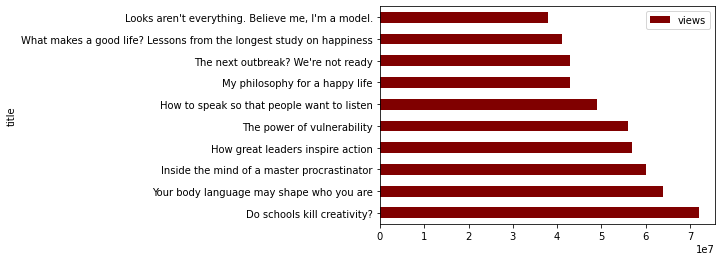

In [13]:
top_speech.plot(kind='barh', x = 'title', y = 'views', color = 'maroon')
plt.show()

In [14]:
# Top 10 authors in terms of number of views & likes
top_author = ted.groupby(['author']).sum().sort_values('views', ascending = False).head(10)
top_author

,views,likes
author,,
Alex Gendler,187196000,5691000
Sir Ken Robinson,95654000,2833600
Bill Gates,77800000,2349000
Simon Sinek,74800000,2246000
Brené Brown,72000000,2204000
Julian Treasure,64300000,1870000
Amy Cuddy,64000000,1900000
Tim Urban,60000000,1800000
Iseult Gillespie,54998000,1660900


In [16]:
# Top 10 author with the most speeches
num_speeches = ted['author'].value_counts().reset_index()
num_speeches.columns = ['author', 'speeches']
num_speeches = num_speeches.sort_values(by = 'speeches', ascending = False).head(10)
num_speeches

,author,speeches
0,Alex Gendler,45
1,Iseult Gillespie,33
2,Matt Walker,18
3,Alex Rosenthal,15
4,Elizabeth Cox,13
5,Emma Bryce,12
6,Juan Enriquez,11
7,Daniel Finkel,11
8,Jen Gunter,9
9,Greg Gage,9


Text(0.5, 1.0, 'Top 10 authors with the most speeches')

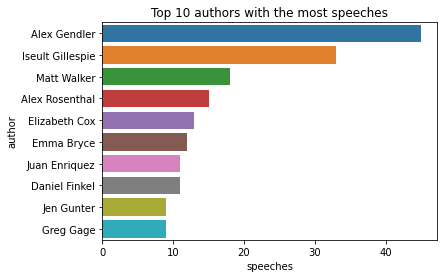

In [18]:
chart_speeches = sns.barplot (data = num_speeches, x = 'speeches', y = 'author')
plt.title("Top 10 authors with the most speeches")

In [19]:
# Seperate 'date' column into 'month' & 'year' columns
def getmonth(mylist):
    monthlist = 'January February March April May June July August September October November December'.split()
    month = mylist[0].split()[0]
    return monthlist.index(month)+1

def getyear(mylist):
    year = int(mylist[0].split()[1])
    return year
    
ted['month'] = ted[['date']].apply(getmonth, axis=1)
ted['year'] = ted[['date']].apply(getyear, axis=1)

In [20]:
# Remove 'date' column
ted.drop('date', axis=1, inplace=True)

Text(0.5, 1.0, 'Number of speeches per year')

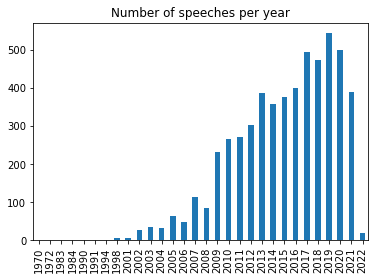

In [21]:
# Number of speeches per year
data_year = ted.year.value_counts().sort_index()
data_year.plot(kind = 'bar')
plt.title("Number of speeches per year")

Text(0.5, 1.0, 'Number of speeches per month')

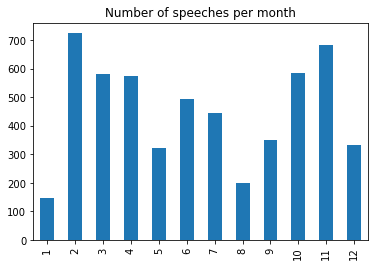

In [22]:
# Number of speeches per month
data_month = ted.month.value_counts().sort_index()
data_month.plot(kind = 'bar')
plt.title("Number of speeches per month")

In [23]:
ted.to_csv('ted_python.csv')